# Modeling

In [2]:
# import libraries 
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# opening cleaned data 
housing_data = pd.read_csv('KC_Data/cleaned_housing_data', index_col = 0)

In [7]:
develop_houses = housing_data[(housing_data['price'] >= 27360) & (housing_data['price'] <= 2307500)]

In [8]:
develop_houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,...,sqft_garage,sqft_patio,yr_built,yr_renovated,zipcode,sold_year,sold_month,age_sold,renovated,city
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,...,0,40,1969,0,98055,2022,5,53,False,Renton
1,750000.0,3,2.0,1830,7969,1.0,NO,NO,NO,Average,...,240,90,1950,2008,98055,2022,3,72,True,Renton
2,728000.0,4,2.0,2170,7520,1.0,NO,NO,NO,Average,...,490,60,1973,0,98055,2022,3,49,False,Renton
3,565000.0,4,2.0,1400,10364,1.5,NO,NO,NO,Good,...,330,330,1971,0,98055,2022,3,51,False,Renton
4,645000.0,3,2.0,1520,8250,1.0,NO,NO,NO,Average,...,420,200,1981,0,98055,2021,12,40,False,Renton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29157,750000.0,3,1.0,1530,33250,1.5,NO,NO,NO,Very Good,...,0,360,1904,0,98050,2021,9,117,False,Preston
29158,315000.0,1,1.0,480,7475,1.0,NO,NO,YES,Average,...,0,0,1908,1970,98224,2021,7,113,True,Baring
29159,250000.0,2,1.0,1040,114998,1.0,NO,NO,YES,Fair,...,0,0,1928,0,98224,2021,11,93,False,Baring
29160,202000.0,2,1.0,1260,11160,1.5,NO,NO,YES,Average,...,0,110,1918,0,98224,2021,10,103,False,Baring


In [9]:
x = develop_houses[['sqft_living']]
y = develop_houses['price']
X_constant = sm.add_constant(x)
results_baseline = sm.OLS(y, X_constant).fit()
results_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        14:59:06   Log-Likelihood:            -3.8827e+05
No. Observations:               27290   AIC:                         7.765e+05
Df Residuals:                   27288   BIC:                         7.766e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.202e+05   5959.233     53.725      0.000    3.08e+05    3.32e+05
sqft_living   313.0602      2.754    113.694      0.000     307.663     318.457
==============================================================================
Omnibus:                     1471.260   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1853.631
Skew:                           0.540   Prob(JB):                         0.00
Kurtosis:                       3.680   Cond. No.                     5.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

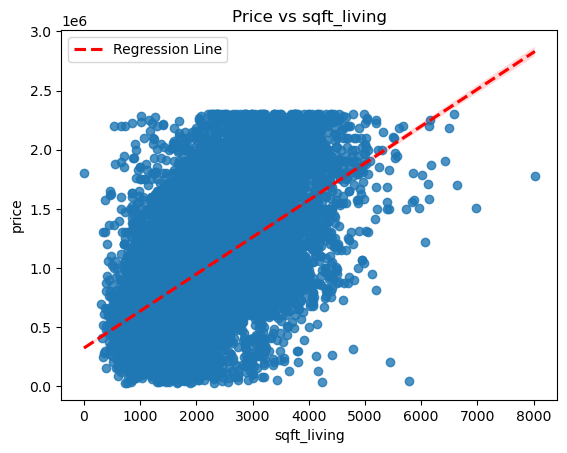

In [11]:
fig, ax = plt.subplots()
sns.regplot(x = 'sqft_living', y = 'price', data = develop_houses,
            line_kws = {"color": "red", "linestyle": "--", "label": "Regression Line"}, ax = ax)
ax.legend()
ax.set_title('Price vs sqft_living')
plt.show()

In [14]:
x1 = develop_houses[['sqft_living','bedrooms']]
y = develop_houses['price']
X1_augmented = sm.add_constant(x1)
results_1 = sm.OLS(y, X1_augmented).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     6574.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:16:56   Log-Likelihood:            -3.8820e+05
No. Observations:               27290   AIC:                         7.764e+05
Df Residuals:                   27287   BIC:                         7.764e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.901e+05   8236.804     47.361      0.000    3.74e+05    4.06e+05
sqft_living   341.0540      3.571     95.514      0.000     334.055     348.053
bedrooms    -3.726e+04   3038.119    -12.265      0.000   -4.32e+04   -3.13e+04
==============================================================================
Omnibus:                     1489.423   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1905.231
Skew:                           0.538   Prob(JB):                         0.00
Kurtosis:                       3.719   Cond. No.                     8.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""